# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
#%load_ext nb_black

import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from numpy import percentile

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# To build model for prediction
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from xgboost import XGBClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)
# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    #plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
visa = pd.read_csv('/content/drive/MyDrive/Great Learning/5.0 Ensemble Techniques/Project/EasyVisa.csv')

In [ ]:
#copying data to another variable to avoid any changes to original data
data = visa.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
#top 5 rows of the data
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.20290,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65000,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.86000,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03000,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39000,Year,Y,Certified


In [ ]:
#last 5 rows of the data
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57000,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79000,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85000,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77000,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91000,Year,Y,Certified


In [ ]:
#shape of the data
data.shape

(25480, 12)

In [ ]:
#data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
#checking for duplicates
data.duplicated().sum()

0

In [ ]:
#no duplicates present in data

In [ ]:
print(data.isnull().sum())

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64


In [ ]:
#no missing values in the data so no missing value treatment needed

In [ ]:
#making a list of all catagorical variables
cat_col = list(data.select_dtypes("object").columns)

#number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

In [ ]:
#checking the number of unique values
data["case_id"].unique()

array(['EZYV01', 'EZYV02', 'EZYV03', ..., 'EZYV25478', 'EZYV25479',
       'EZYV25480'], dtype=object)

In [ ]:
#25480 unique values

In [ ]:
#statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.00000,5667.04321,22877.92885,-26.00000,1022.00000,2109.00000,3504.00000,602069.00000
yr_of_estab,25480.00000,1979.40993,42.36693,1800.00000,1976.00000,1997.00000,2005.00000,2016.00000
prevailing_wage,25480.00000,74455.81459,52815.94233,2.13670,34015.48000,70308.21000,107735.51250,319210.27000


In [ ]:
#no_of_employees can't be negavtive
data["no_of_employees"] = abs(data["no_of_employees"])

In [ ]:
#reviewing that no_of_employees is non negative
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.00000,5667.08921,22877.91745,11.00000,1022.00000,2109.00000,3504.00000,602069.00000
yr_of_estab,25480.00000,1979.40993,42.36693,1800.00000,1976.00000,1997.00000,2005.00000,2016.00000
prevailing_wage,25480.00000,74455.81459,52815.94233,2.13670,34015.48000,70308.21000,107735.51250,319210.27000


In [ ]:
#dropping case_id
data.drop(['case_id'], axis = 1, inplace = True)

In [ ]:
#checking that case_id has been dropped
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.20290,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.65000,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.86000,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.03000,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.39000,Year,Y,Certified


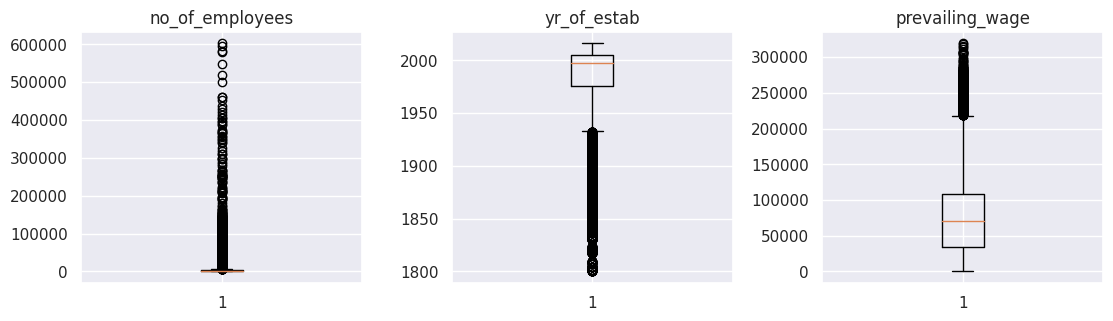

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.00000,5667.08921,22877.91745,11.00000,1022.00000,2109.00000,3504.00000,602069.00000
yr_of_estab,25480.00000,1979.40993,42.36693,1800.00000,1976.00000,1997.00000,2005.00000,2016.00000
prevailing_wage,25480.00000,74455.81459,52815.94233,2.13670,34015.48000,70308.21000,107735.51250,319210.27000


In [ ]:
print('Number of Employees Statistical Summary\n')

print("Mean: " + str(data['no_of_employees'].mean()))
print("Median: " + str(data['no_of_employees'].median()))
print("Quartiles: " + str(percentile(data['no_of_employees'], [25, 50, 75])))
# Calculating the 25th quantile
Q1 = data["no_of_employees"].quantile(0.25)
# Calculating the 75th quantile
Q3 = data["no_of_employees"].quantile(0.75)
# Calculating IQR
IQR = Q3 - Q1
print("IQR: " + str(IQR))
# Calculating value of upper whisker
print("Upper_Whisker: " + str(Q3 + 1.5 * IQR))
# Calculating value of lower whisker
print("Lower_Whisker: " +str(Q1 - 1.5 * IQR))
print("Min: " + str(data['no_of_employees'].min()))
print("Max: " + str(data['no_of_employees'].max()))

Number of Employees Statistical Summary

Mean: 5667.08920722135
Median: 2109.0
Quartiles: [1022. 2109. 3504.]
IQR: 2482.0
Upper_Whisker: 7227.0
Lower_Whisker: -2701.0
Min: 11
Max: 602069


In [ ]:
#ignore lower whisker - it implies businesses can have a negative number of employees

In [ ]:
print('Year of Establishment Statistical Summary\n')
print("Mean: " + str(data['yr_of_estab'].mean()))
print("Median: " + str(data['yr_of_estab'].median()))
print("Quartiles: " + str(percentile(data['yr_of_estab'], [25, 50, 75])))
# Calculating the 25th quantile
Q1 = data["yr_of_estab"].quantile(0.25)
# Calculating the 75th quantile
Q3 = data["yr_of_estab"].quantile(0.75)
# Calculating IQR
IQR = Q3 - Q1
print("IQR: " + str(IQR))
# Calculating value of upper whisker
print("Upper_Whisker: " + str(Q3 + 1.5 * IQR))
# Calculating value of lower whisker
print("Lower_Whisker: " +str(Q1 - 1.5 * IQR))
print("Min: " + str(data['yr_of_estab'].min()))
print("Max: " + str(data['yr_of_estab'].max()))

Year of Establishment Statistical Summary

Mean: 1979.409929356358
Median: 1997.0
Quartiles: [1976. 1997. 2005.]
IQR: 29.0
Upper_Whisker: 2048.5
Lower_Whisker: 1932.5
Min: 1800
Max: 2016


In [ ]:
#ignore upper whisker - it implies businesses are established in the future

In [ ]:
print('Prevailing Wage Statistical Summary')
print("Mean: " + str(data['prevailing_wage'].mean()))
print("Median: " + str(data['prevailing_wage'].median()))
print("Quartiles: " + str(percentile(data['prevailing_wage'], [25, 50, 75])))
# Calculating the 25th quantile
Q1 = data["prevailing_wage"].quantile(0.25)
# Calculating the 75th quantile
Q3 = data["prevailing_wage"].quantile(0.75)
# Calculating IQR
IQR = Q3 - Q1
print("IQR: " + str(IQR))
# Calculating value of upper whisker
print("Upper_Whisker: " + str(Q3 + 1.5 * IQR))
# Calculating value of lower whisker
print("Lower_Whisker: " +str(Q1 - 1.5 * IQR))
print("Min: " + str(data['prevailing_wage'].min()))
print("Max: " + str(data['prevailing_wage'].max()))

Prevailing Wage Statistical Summary
Mean: 74455.81459209183
Median: 70308.20999999999
Quartiles: [ 34015.48    70308.21   107735.5125]
IQR: 73720.03250000002
Upper_Whisker: 218315.56125000003
Lower_Whisker: -76564.56875000002
Min: 2.1367
Max: 319210.27


In [ ]:
#ignore lower whisker - it implies an employee can have a negative salary

In [ ]:
#There are quite a few outliers in the data
#However, we will not treat them as they are proper values
#a large amount of the data seems to be outliers, so to preserve our interpretation of the data, we will keep the outliers for each numerical column

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  #number of rows of the subplot grid= 2
        sharex=True,  #x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  #creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  #boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  #histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  #add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  #add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

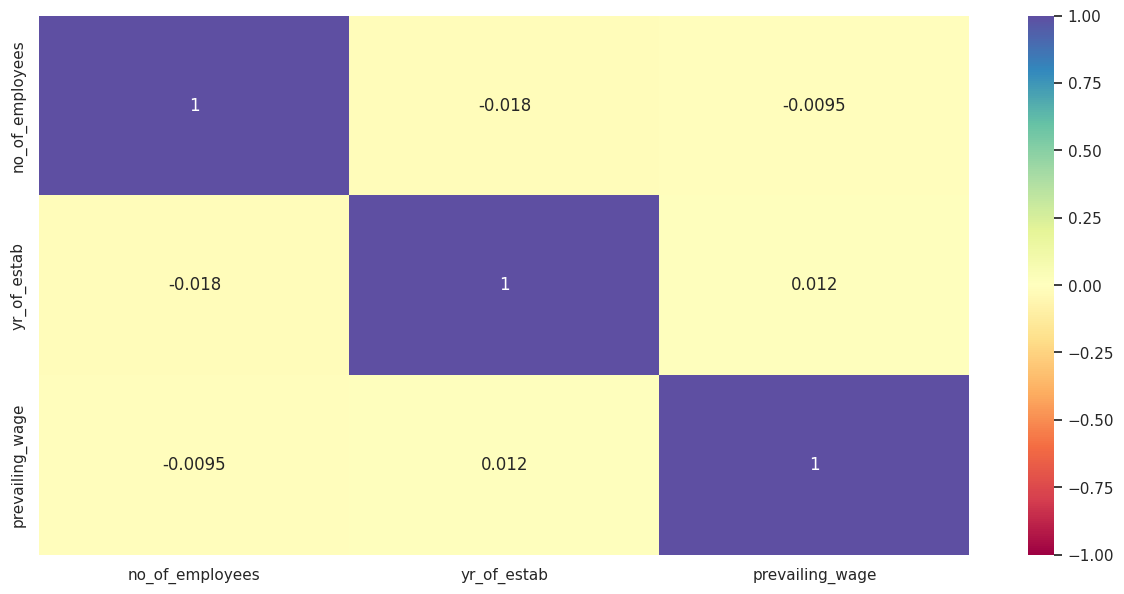

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

**Q1:** Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

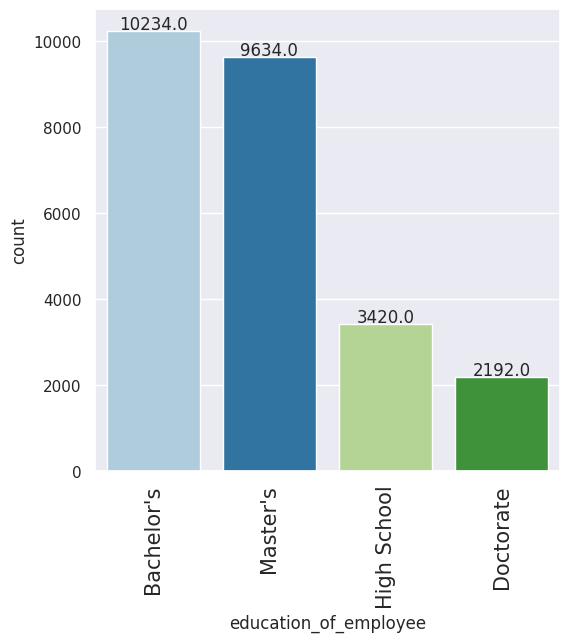

In [ ]:
labeled_barplot(data, 'education_of_employee')

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


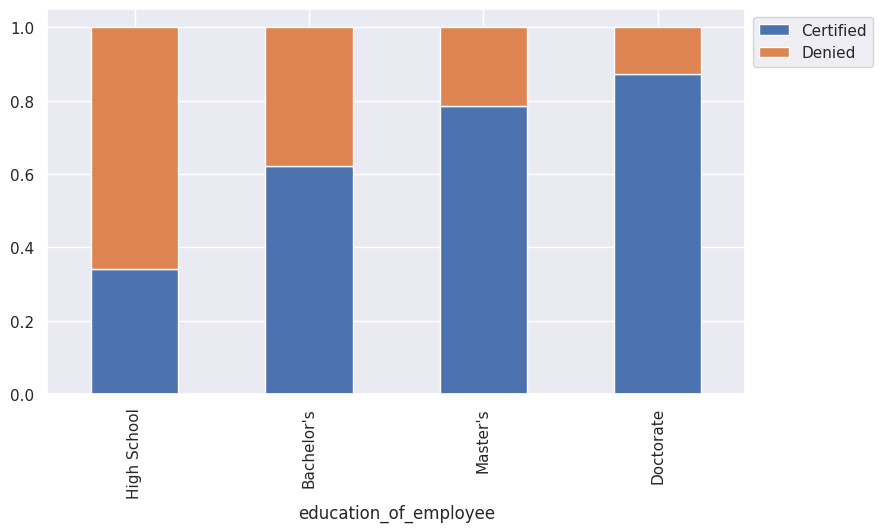

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

It seems that education does indeed play a role in visa certification. According to the above bar plot,  employees with a higher level of education have a higher percentage of being certified for a visa.

**Q2:** How does the visa status vary across different continents?

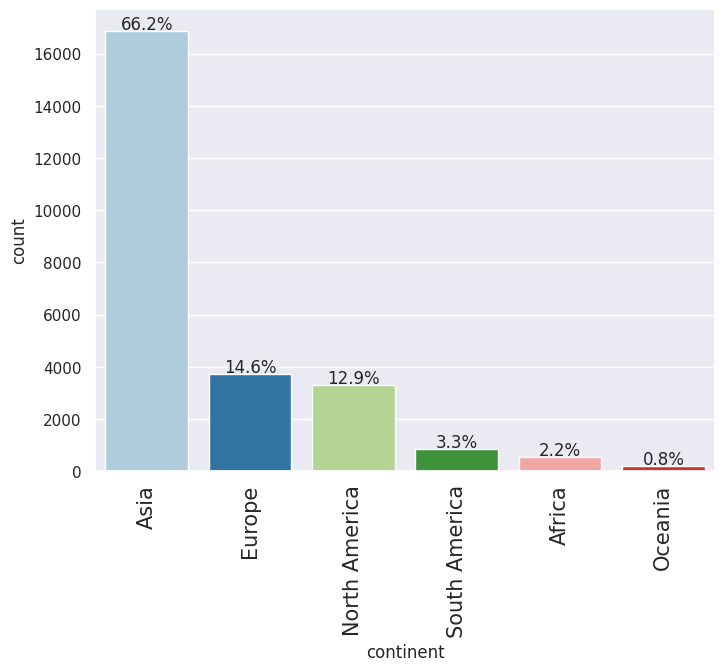

In [ ]:
labeled_barplot(data, "continent", perc=True)

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


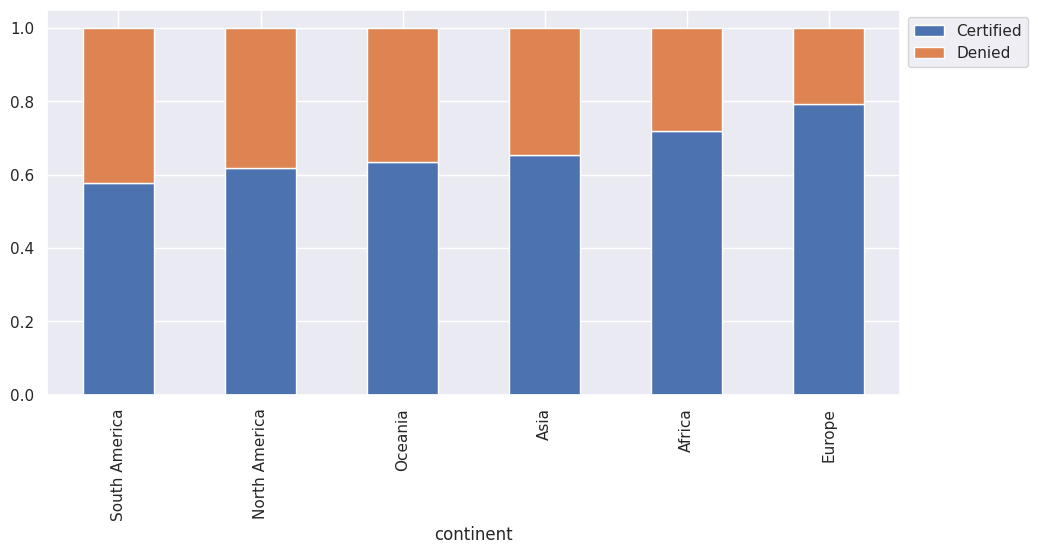

In [ ]:
stacked_barplot(data, "continent", "case_status")

continent    Africa   Asia  Europe  North America  Oceania  South America  \
case_status                                                                 
All             551  16861    3732           3292      192            852   
Certified       397  11012    2957           2037      122            493   
Denied          154   5849     775           1255       70            359   

continent      All  
case_status         
All          25480  
Certified    17018  
Denied        8462  
------------------------------------------------------------------------------------------------------------------------


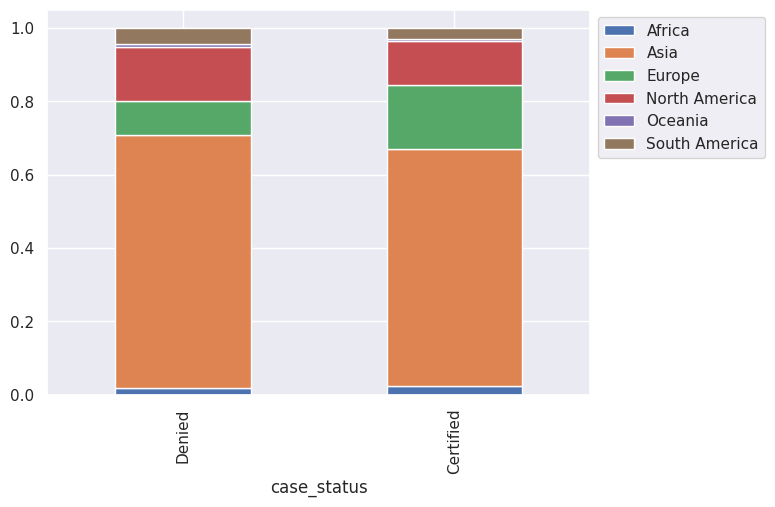

In [ ]:
stacked_barplot(data, 'case_status', 'continent')

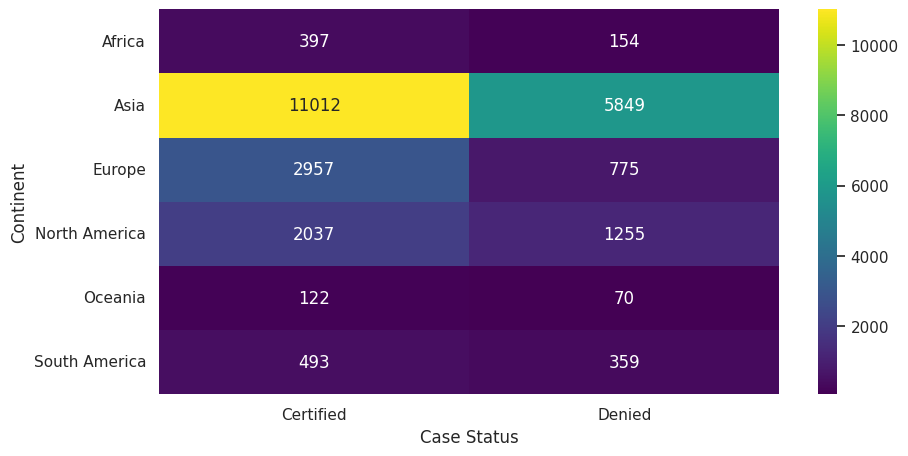

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data['continent'], data['case_status']),
    annot=True,
    fmt="g",
    cmap="viridis"
)

plt.ylabel("Continent")
plt.xlabel("Case Status")
plt.show()

Europe has the highest percentage of visa certified workers at approximately 79%, followed by Africa with about 72%, Asia with about 65%, Oceania with about 63%, North America with about 62% and lastly South America with about 58%.

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


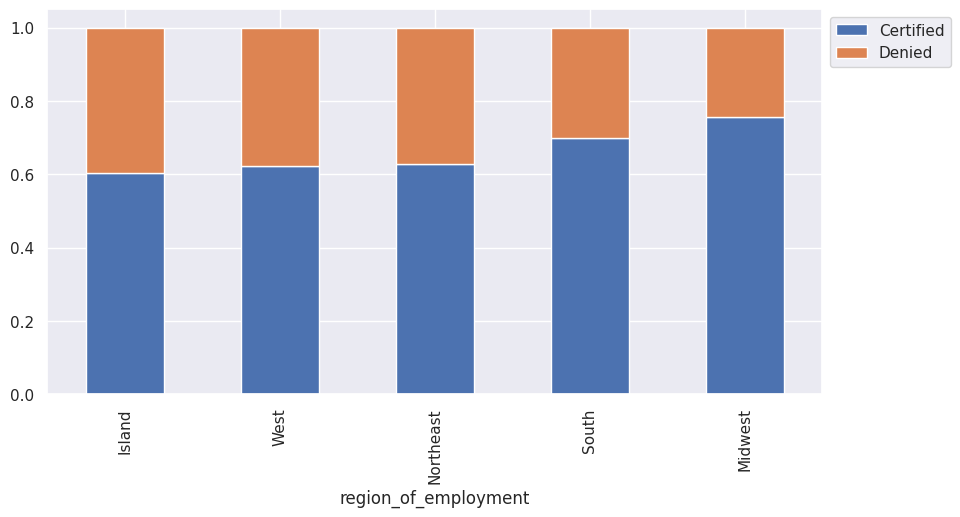

In [ ]:
stacked_barplot(data, 'region_of_employment', 'case_status')

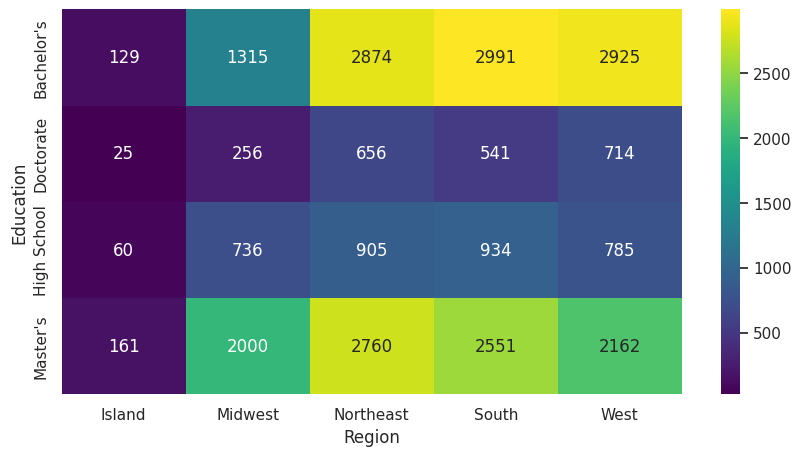

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data['education_of_employee'], data['region_of_employment']),
    annot=True,
    fmt="g",
    cmap="viridis"
)

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

**Q3: ** Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

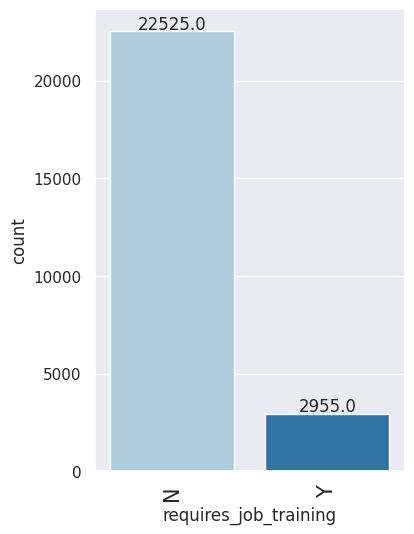

In [ ]:
labeled_barplot(data, 'requires_job_training')

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


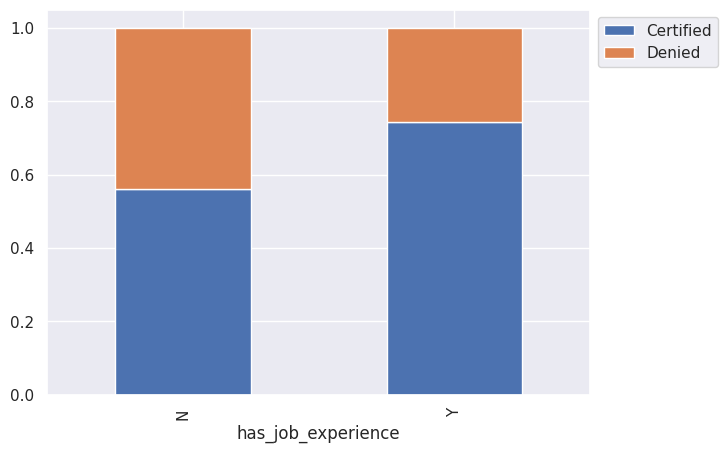

In [ ]:
stacked_barplot(data, 'has_job_experience', 'case_status')

Those with work experience have a higher visa certification at approximately 74% and those without work experience have a visa certification of about 56%.

**Q4: **In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

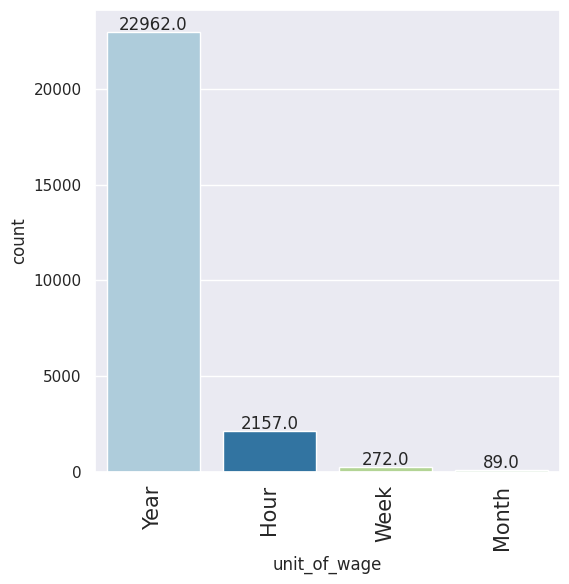

In [ ]:
labeled_barplot(data, 'unit_of_wage')

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


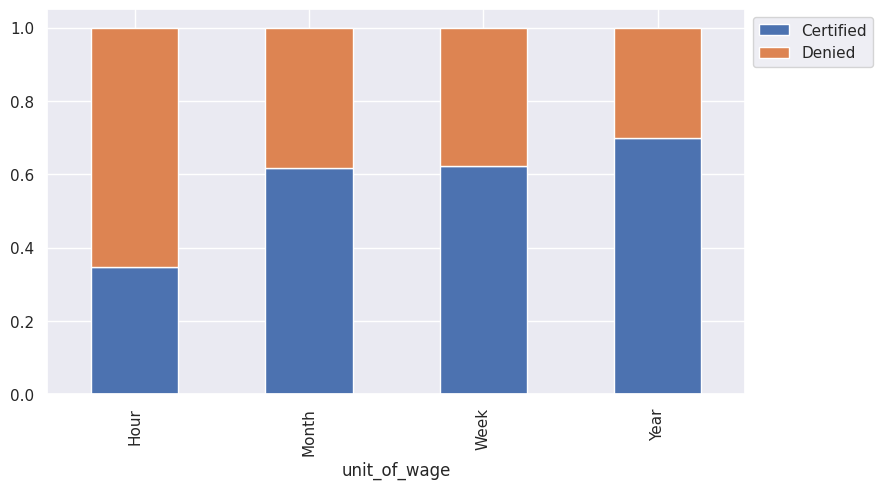

In [ ]:
stacked_barplot(data, 'unit_of_wage', 'case_status')

A yearly salary is most likely to be visa certified while an hourly salary is least likely to be certified.

**Q5:** The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

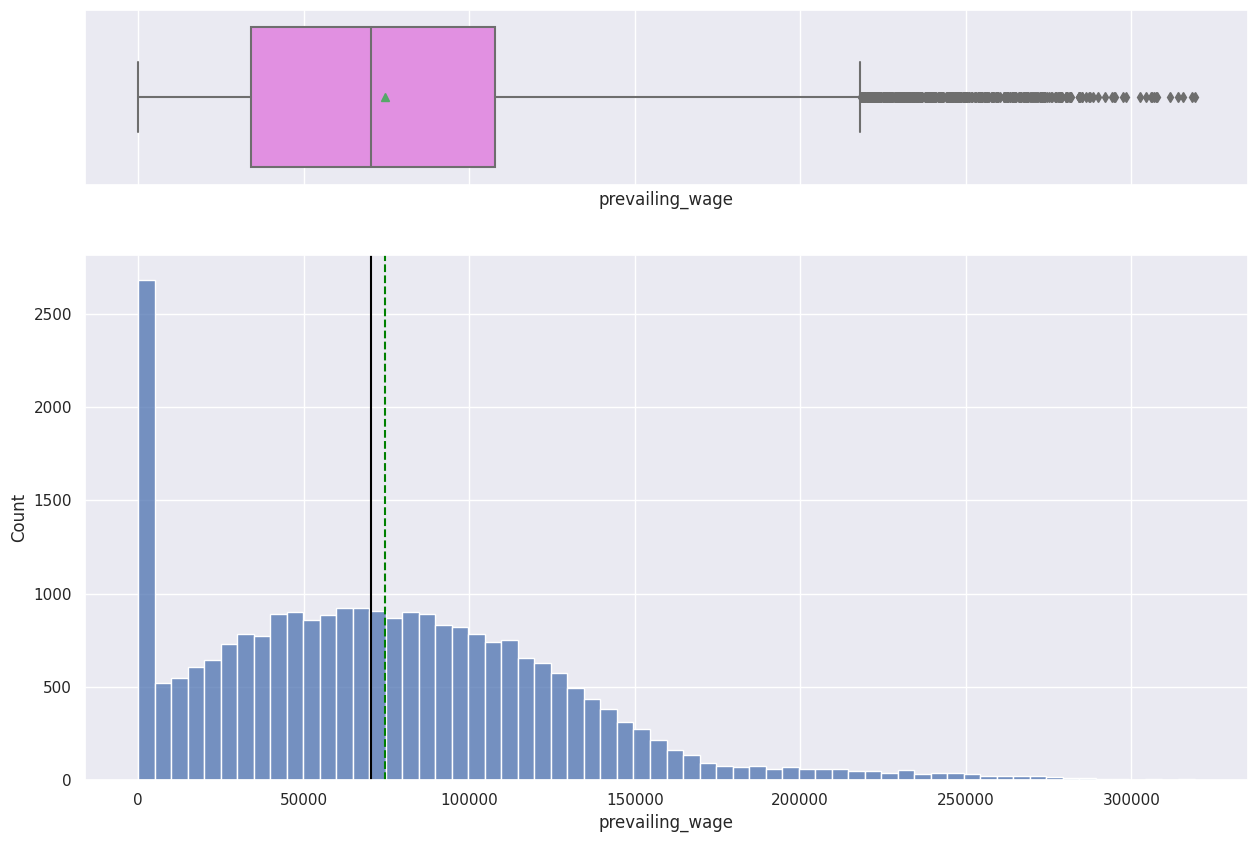

In [ ]:
histogram_boxplot(data, 'prevailing_wage')

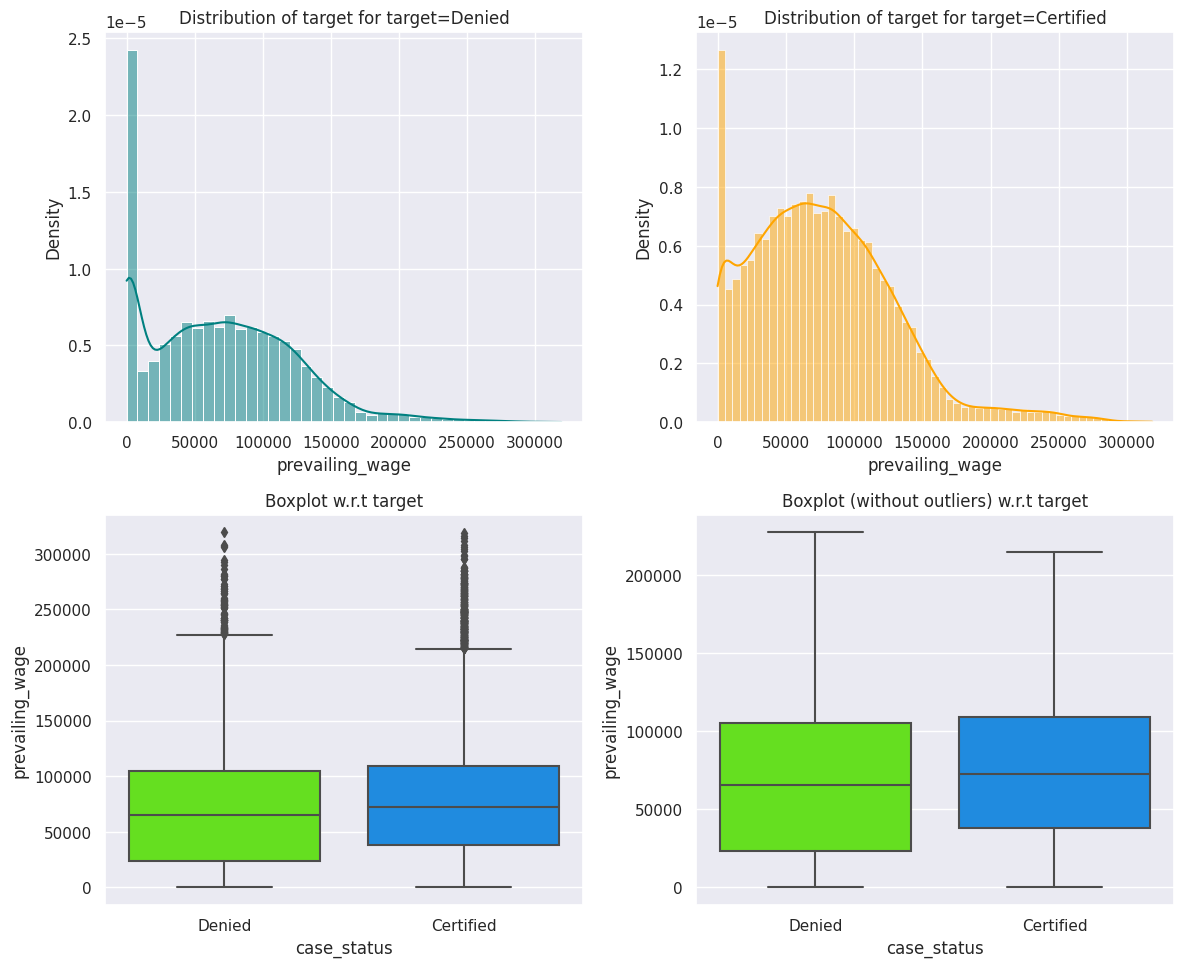

In [ ]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'case_status')

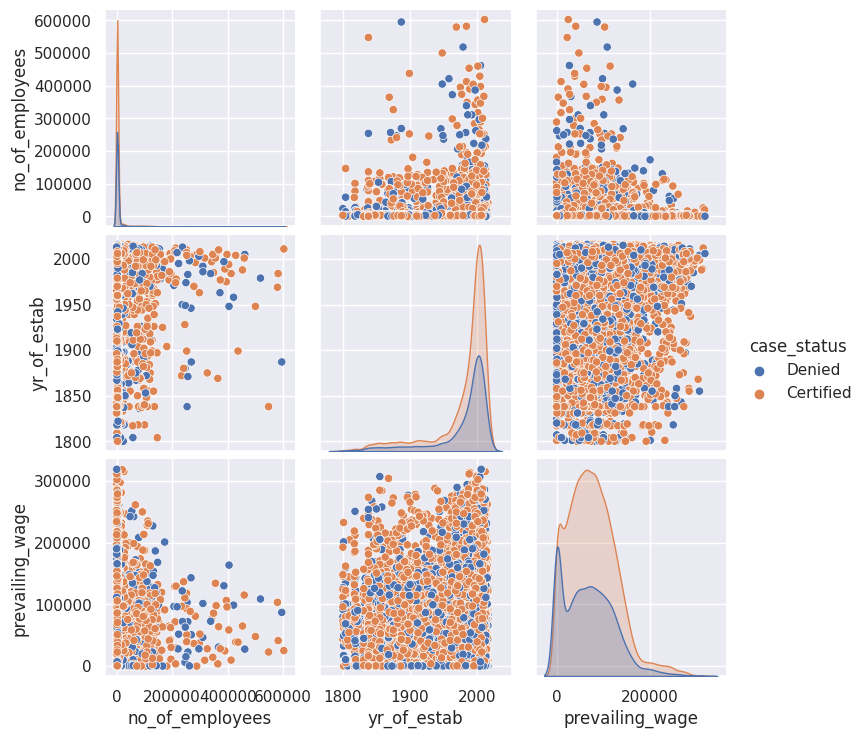

In [ ]:
sns.pairplot(data=data,hue="case_status")
plt.show()

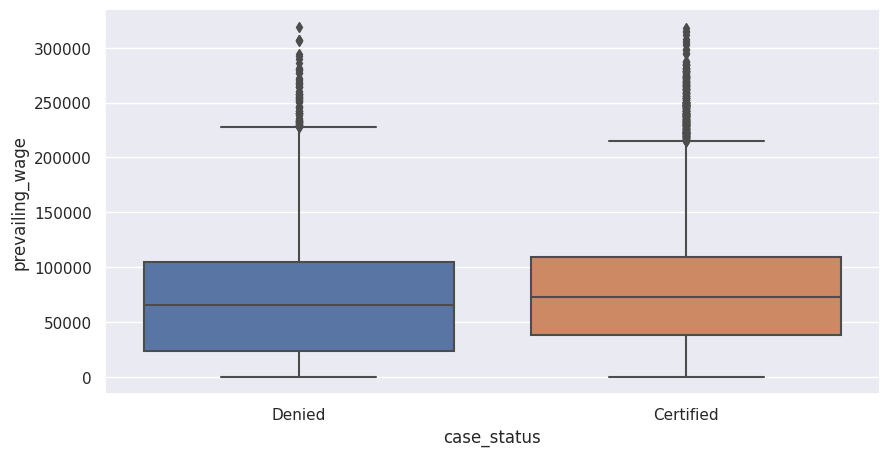

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data, x='case_status', y='prevailing_wage')
plt.show()

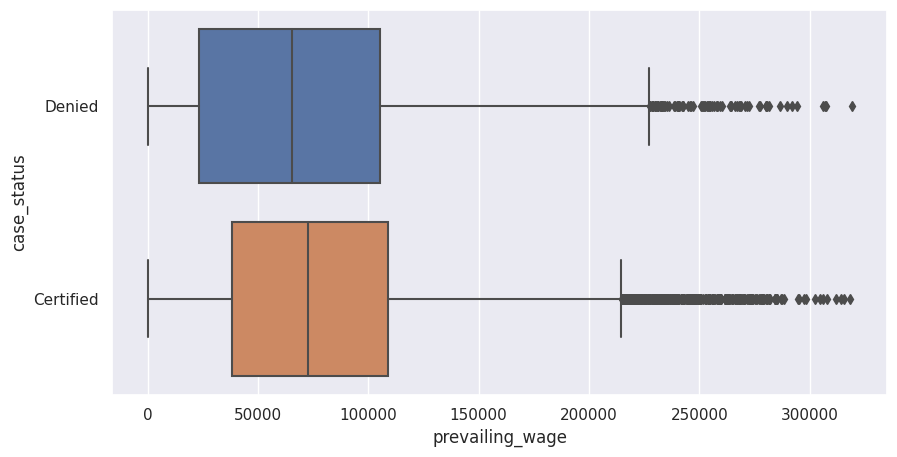

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data, x='prevailing_wage', y='case_status')
plt.show()

In [ ]:
print(data.groupby('case_status').median())

             no_of_employees  yr_of_estab  prevailing_wage
case_status                                               
Certified         2147.00000   1997.00000      72486.27000
Denied            2032.50000   1997.00000      65431.46000


In [ ]:
print(data.groupby('case_status').mean())

             no_of_employees  yr_of_estab  prevailing_wage
case_status                                               
Certified         5807.05588   1979.66676      77293.61924
Denied            5385.60104   1978.89341      68748.68158


The median of prevailing wages for visa certified individuals is slightly higher than those that were denied a visa, but not by much. Certified visa status individuals have a median prevailing wage of 72,486.27 dollars (mean of 77,293.62) and those who were denied have a median of 65,431.46 dollars (mean of 68,748.68).

## Building bagging and boosting models

### **Model Evaluation Criteria**

**This model can make wrong predictions as:**
1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

**Which case is more important?**

Both the cases are important as:

1. If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

2. If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.

**Which metric to optimize?**

F1 Score can be used as the metric for evaluation of the model (greater the F1 score higher are the chances of minimizing False Negatives and False Positives). Using balanced class weights allows the model to focus equally on both classes.

In [ ]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop(['case_status'], axis=1) #drop case status from the data
Y = data["case_status"]

# adding constant
X = sm.add_constant(X)

X = pd.get_dummies(X, drop_first=True)  #create dummies for X

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y) #split the data into train and test in the ratio 70:30

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 22)
Shape of test set :  (7644, 22)
Percentage of classes in training set:
1   0.66792
0   0.33208
Name: case_status, dtype: float64
Percentage of classes in test set:
1   0.66784
0   0.33216
Name: case_status, dtype: float64


In [ ]:
 #we have 17,836 observations in the train set and observations in the test set

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    #predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    #creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Decision Tree**

In [ ]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

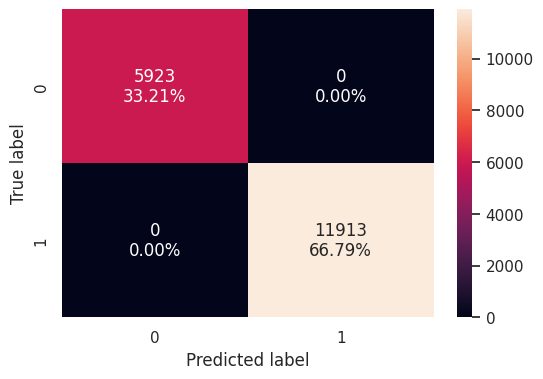

In [ ]:
#checking model performance on training set
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


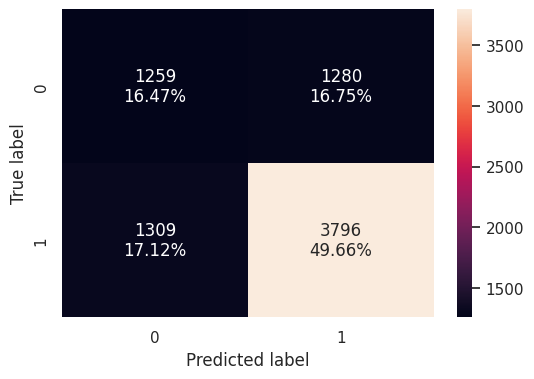

In [ ]:
#checking model performance on test set
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.66130,0.74358,0.74783,0.74570


In [ ]:
#The Decision tree model with default parameters is overfitting the train data
#Have to tune hyperparameters to see if we cam reduce overfitting

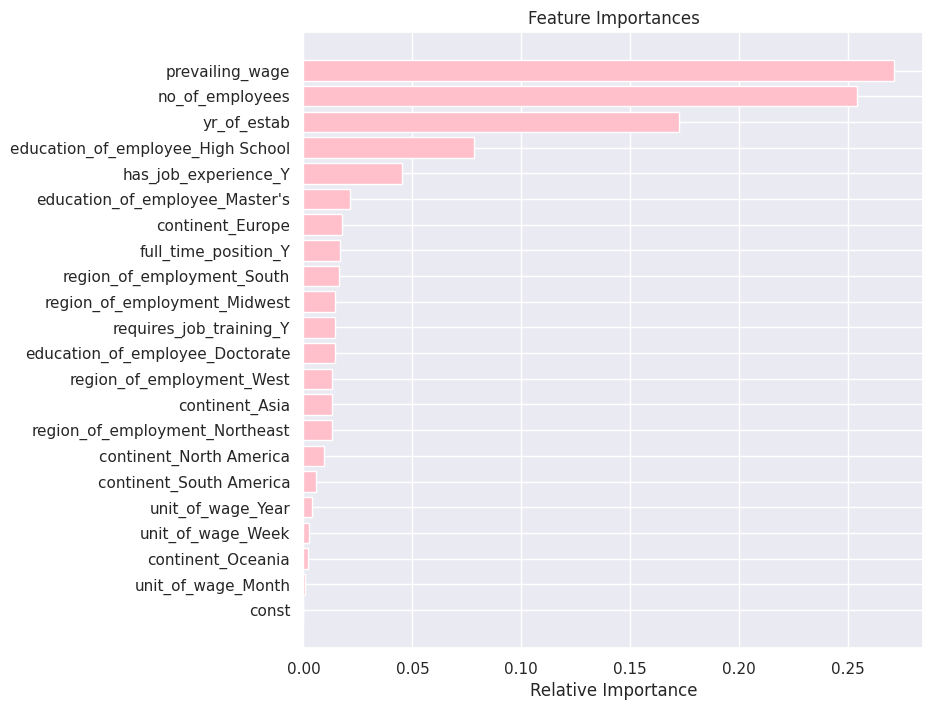

In [ ]:
#hyperparameter tuning
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="pink", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
#decision tree classifier
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

#grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

#type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)## Complete the code to run grid search with n_jobs = -1

grid_obj = grid_obj.fit(X_train, y_train)

#set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

#fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

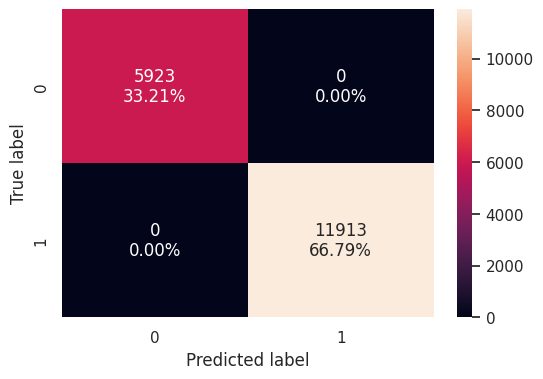

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(model, X_train, y_train)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


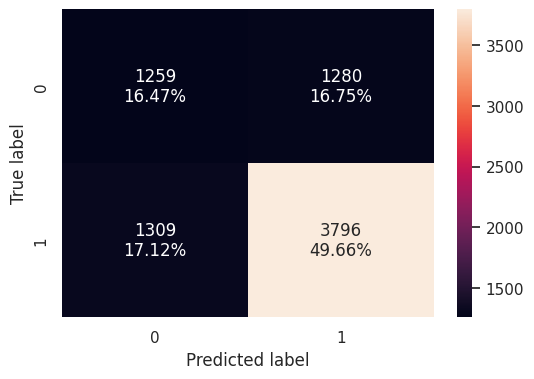

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(model, X_test, y_test)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.66130,0.74358,0.74783,0.74570


In [ ]:
#There's a huge difference between training and test scores for all the metrics so the decision tree is overfitting the training data
#The test recall is abou5 74%

**Bagging** - model building and hyperpearameter tuning

*   Fitting different models on the train data and observing their performance.
Then we'll try to improve that performance by tuning some hyperparameters

*   We'll use GridSearchCv for hyperparameter tuning and r_2 score to optimize the model.

In [ ]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(random_state=1)

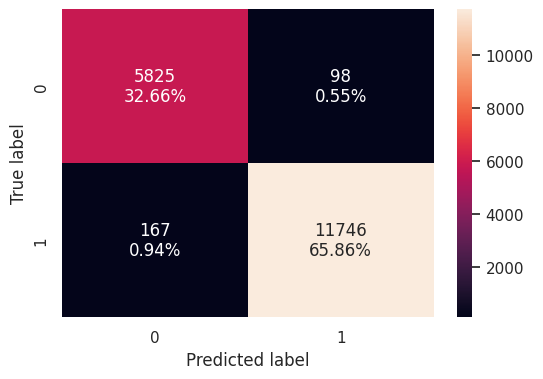

In [ ]:
#checking model performance on train set
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [ ]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, X_train, y_train)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.98514,0.98598,0.99173,0.98885


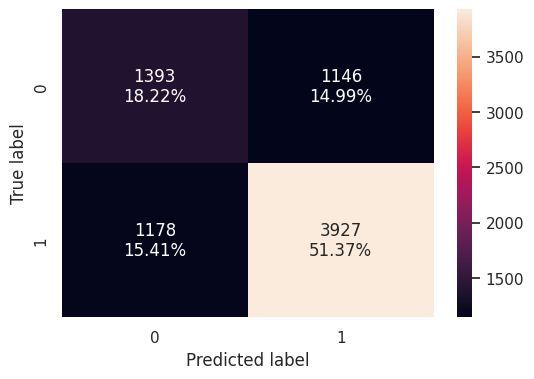

In [ ]:
#checking model performance on test set
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [ ]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test, y_test)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.69597,0.76925,0.77410,0.77166


In [ ]:
#Bagging gives a slightly higher recall than decision tree
#However, it is also overfitting the data

In [ ]:
#Bagging classifier and hyperparameter tuning

#bagging classifier
bagging_estimator_tuned = BaggingClassifier(random_state=1)

#grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

#type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

#run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

#set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

#fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

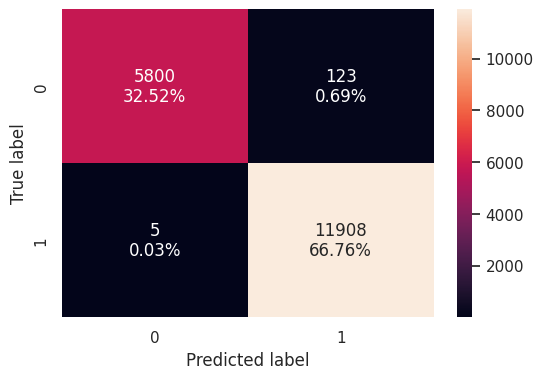

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [ ]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.99282,0.99958,0.98978,0.99465


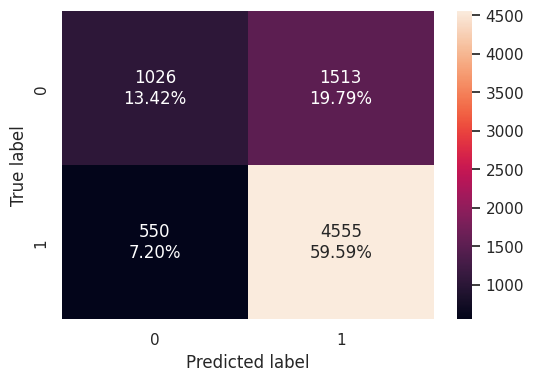

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [ ]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test)
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.73012,0.89226,0.75066,0.81536


**Random Forest**

In [ ]:
#fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

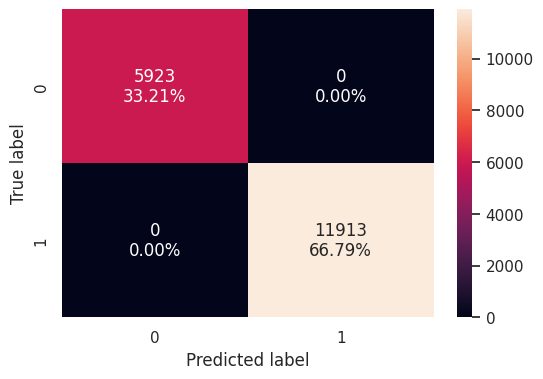

In [ ]:
#checking model performance on training set
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [ ]:
#calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


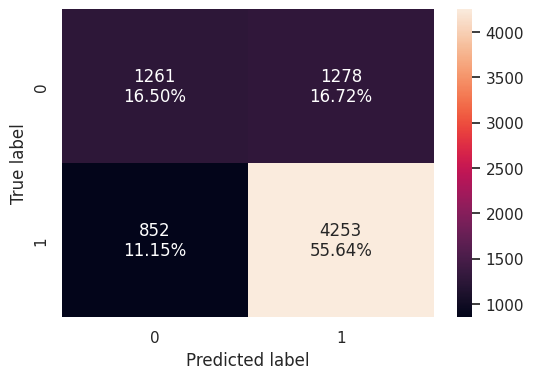

In [ ]:
#checking model performance on test set
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [ ]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.72135,0.83310,0.76894,0.79974


In [ ]:
#Random Forest is overfitting the training data
#Test recall and precicion is higher than the decision tree's

In [ ]:
#random forest and hyperparameter tuning

#random forest classifier
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

#type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

#run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

#set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

#fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=25,
                       oob_score=True, random_state=1)

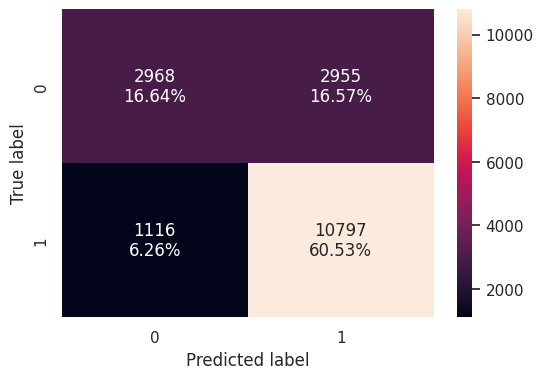

In [ ]:
#checking model performance on training set
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [ ]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.77175,0.90632,0.78512,0.84138


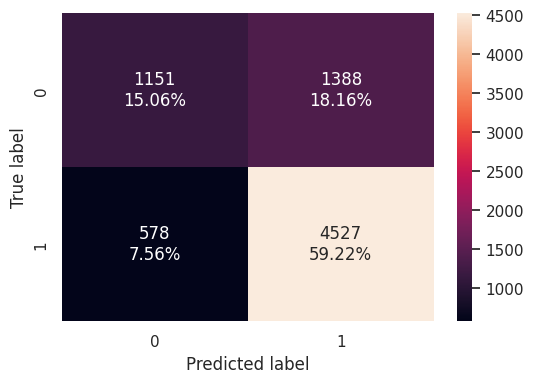

In [ ]:
#checking model performance on test set
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [ ]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.74280,0.88678,0.76534,0.82160


**Boosting**

In [ ]:
#AdaBoost Classifier
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

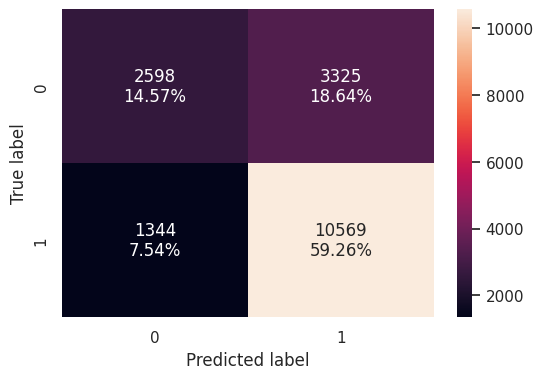

In [ ]:
#checking model performance on training set
confusion_matrix_sklearn(ab_classifier,X_train,y_train)

In [ ]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,X_train,y_train)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.73823,0.88718,0.76069,0.81908


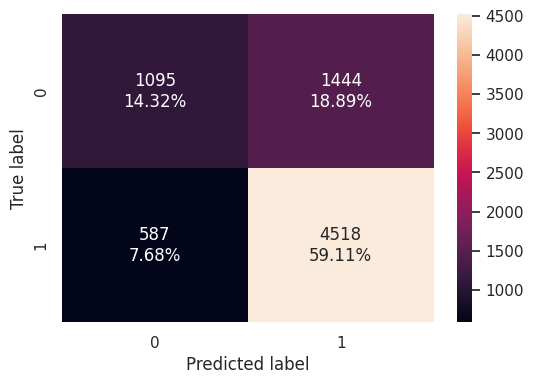

In [ ]:
#checking model performance on test set
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [ ]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,X_test,y_test)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.73430,0.88501,0.75780,0.81648


In [ ]:
#adaBoost classifier and hyperparameter tuning

#adaboost classifier
abc_tuned = AdaBoostClassifier(random_state=1)

#grid of parameters to choose from
parameters = {
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

#type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

#run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

#set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

#fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

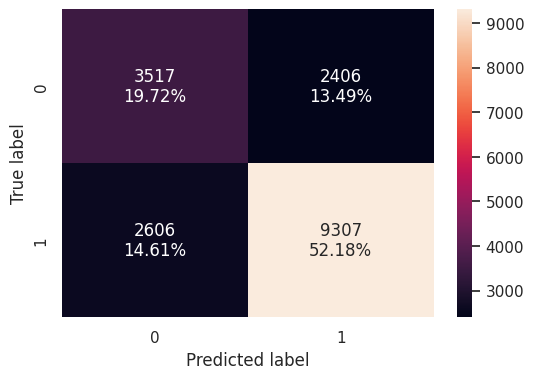

In [ ]:
#checking model performance on training set
confusion_matrix_sklearn(abc_tuned,X_train,y_train)

In [ ]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned,X_train,y_train)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.71900,0.78125,0.79459,0.78786


   Accuracy  Recall  Precision      F1
0   0.71900 0.78125    0.79459 0.78786
   Accuracy  Recall  Precision      F1
0   0.71651 0.78139    0.79147 0.78640


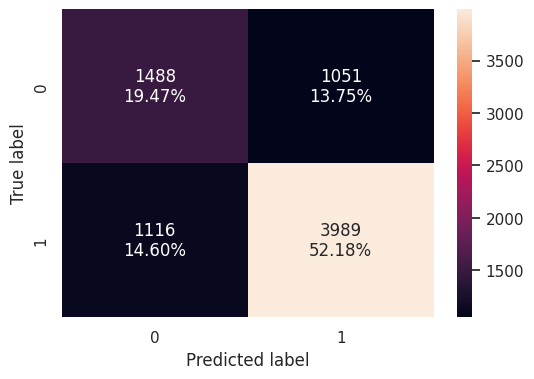

In [ ]:
#checking model performance on test set

#calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)


confusion_matrix_sklearn(abc_tuned,X_test,y_test)

In [ ]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned,X_test,y_test)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.71651,0.78139,0.79147,0.78640


**Gradient Boosting**

In [ ]:
#gradient boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

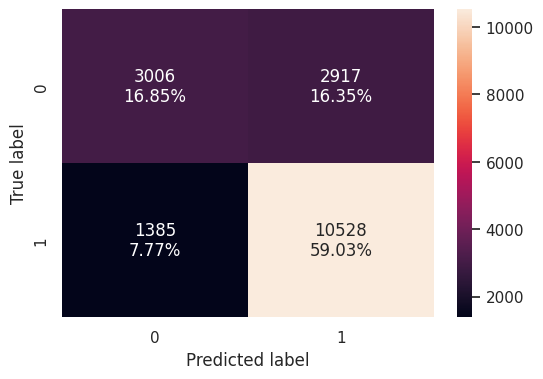

In [ ]:
#checking model performance on training set
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [ ]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier, X_train, y_train)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.75880,0.88374,0.78304,0.83035


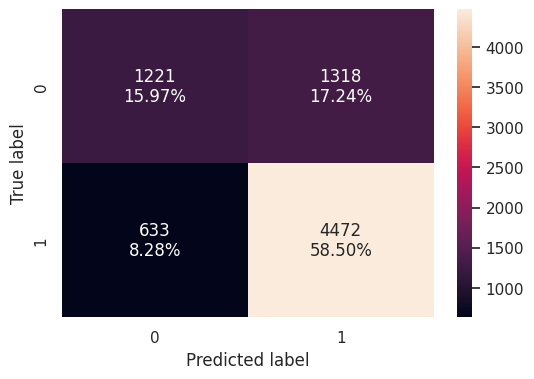

In [ ]:
#checking model performance on test set
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [ ]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier,X_test,y_test)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.74477,0.87600,0.77237,0.82093


In [ ]:
#gradient boosting classifier and hyperparameter tuning

#gradient boosting classifier
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

#grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

#type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

#run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

#set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

#fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

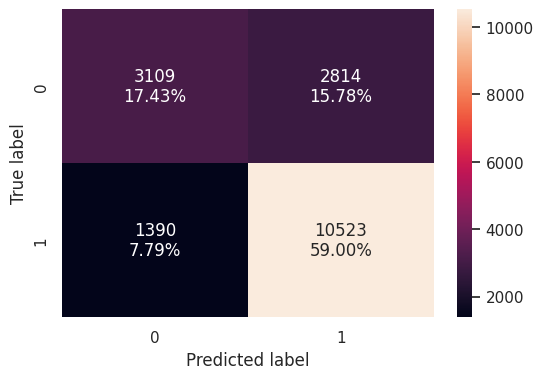

In [ ]:
#checking model performance on training set
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)

In [ ]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.76430,0.88332,0.78901,0.83350


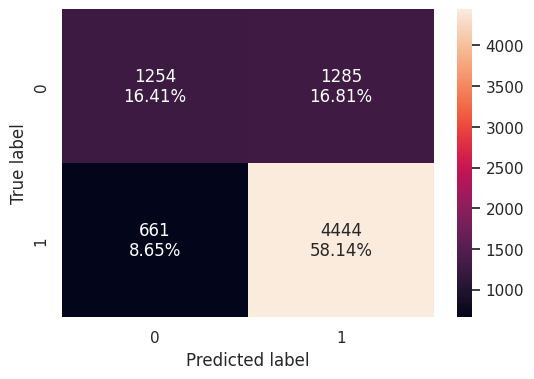

In [ ]:
#checking model performance of test set
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

In [ ]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.74542,0.87052,0.77570,0.82038


**XGBoost**

In [ ]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

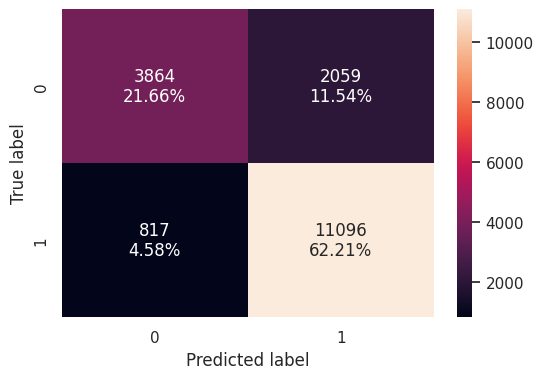

In [ ]:
#checking model performance on training set
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

In [ ]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train, y_train)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.83875,0.93142,0.84348,0.88527


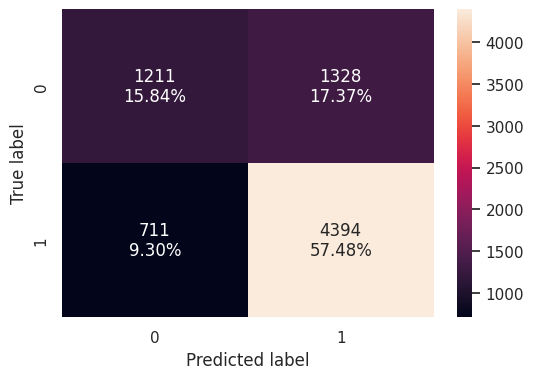

In [ ]:
#checking model performance on test set
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [ ]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.73325,0.86072,0.76791,0.81167


In [ ]:
#XGBoost Classifier and hyperparameter tuning

# XGBoost classifier
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

#grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

#type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

#run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

#set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

#fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=5, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

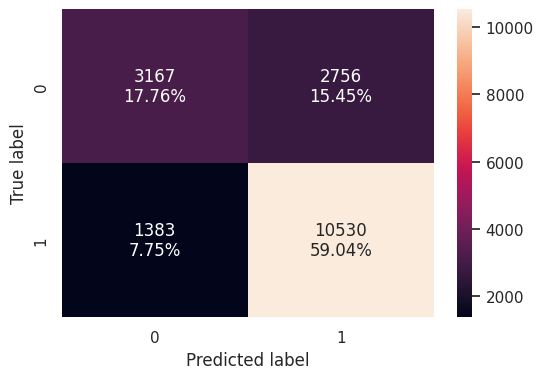

In [ ]:
#checking model performance on training set
confusion_matrix_sklearn(xgb_tuned, X_train,y_train)

In [ ]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train,y_train)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.76794,0.88391,0.79256,0.83575


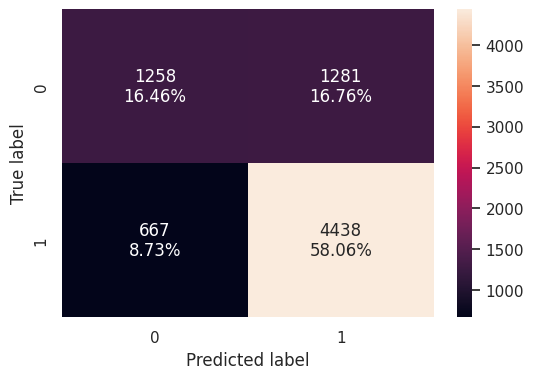

In [ ]:
#checking model performance on test set
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [ ]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.74516,0.86934,0.77601,0.82003


**Stacking**

In [ ]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_split=7,
                                                       n_estimators=25,
                                                       oob_score=True,
                                                       random_state=1))],...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.2,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=200, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

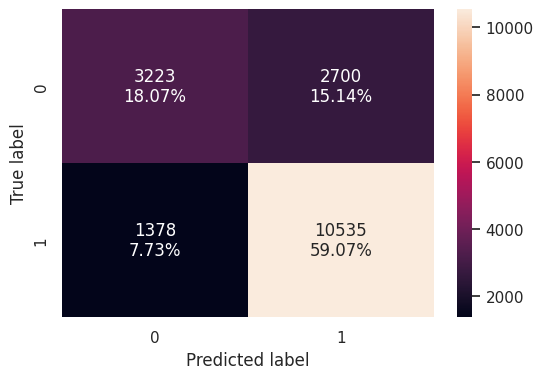

In [ ]:
#checking model performance on training set
confusion_matrix_sklearn(stacking_classifier,X_train,y_train)

In [ ]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.77136,0.88433,0.79600,0.83784


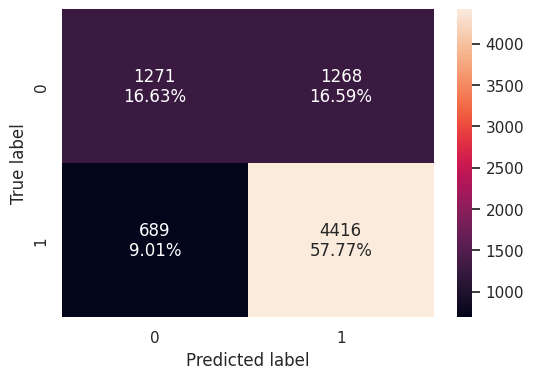

In [ ]:
#checking model performance on test set
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

In [ ]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.74398,0.86503,0.77692,0.81861


**Q:** Will tuning the hyperparameters improve the model performance?

Yes, tuning the hyperparameters did improve the model performance and resulted in more realistic data.



## Model Performance Comparison and Conclusions

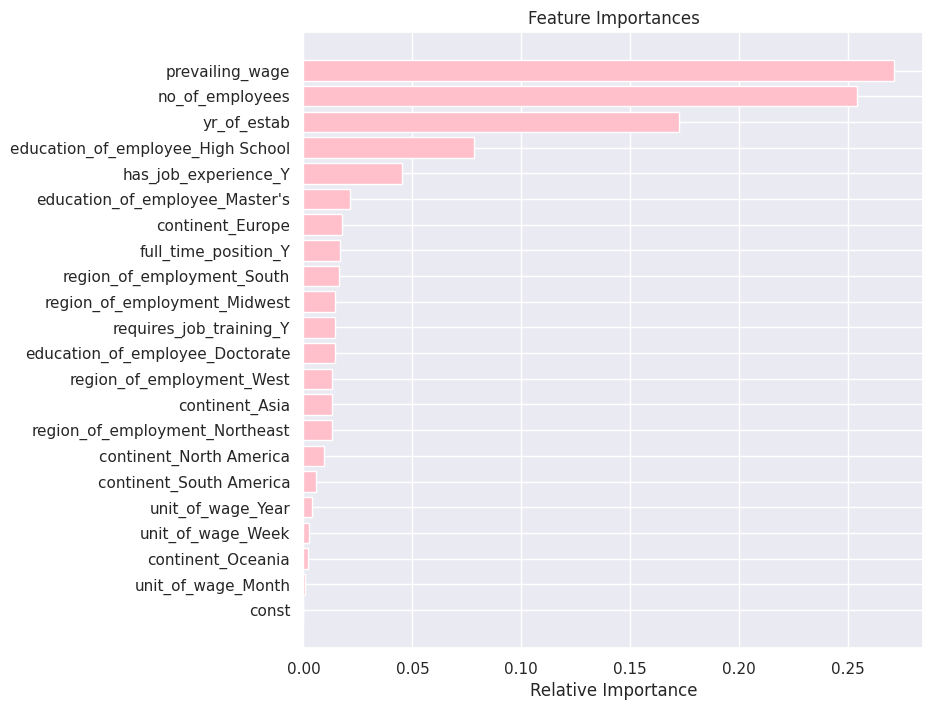

In [ ]:
#hyperparameter tuning
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="pink", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
#training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.00000,1.00000,0.98514,0.99282,1.00000,0.77175,0.73823,0.71900,0.75880,0.76430,0.83875,0.76794,0.77136
Recall,1.00000,1.00000,0.98598,0.99958,1.00000,0.90632,0.88718,0.78125,0.88374,0.88332,0.93142,0.88391,0.88433
Precision,1.00000,1.00000,0.99173,0.98978,1.00000,0.78512,0.76069,0.79459,0.78304,0.78901,0.84348,0.79256,0.79600
F1,1.00000,1.00000,0.98885,0.99465,1.00000,0.84138,0.81908,0.78786,0.83035,0.83350,0.88527,0.83575,0.83784


In [ ]:
#testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T
    ],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.66130,0.66130,0.72135,0.74280,0.69597,0.73012,0.73430,0.71651,0.74477,0.74542,0.73325,0.74516,0.74398
Recall,0.74358,0.74358,0.83310,0.88678,0.76925,0.89226,0.88501,0.78139,0.87600,0.87052,0.86072,0.86934,0.86503
Precision,0.74783,0.74783,0.76894,0.76534,0.77410,0.75066,0.75780,0.79147,0.77237,0.77570,0.76791,0.77601,0.77692
F1,0.74570,0.74570,0.79974,0.82160,0.77166,0.81536,0.81648,0.78640,0.82093,0.82038,0.81167,0.82003,0.81861


The tuned bagging estimator has the highest recall at 89.226% and is the best model to represent the visa data. It also gives a generalized performance as compared to the other models.

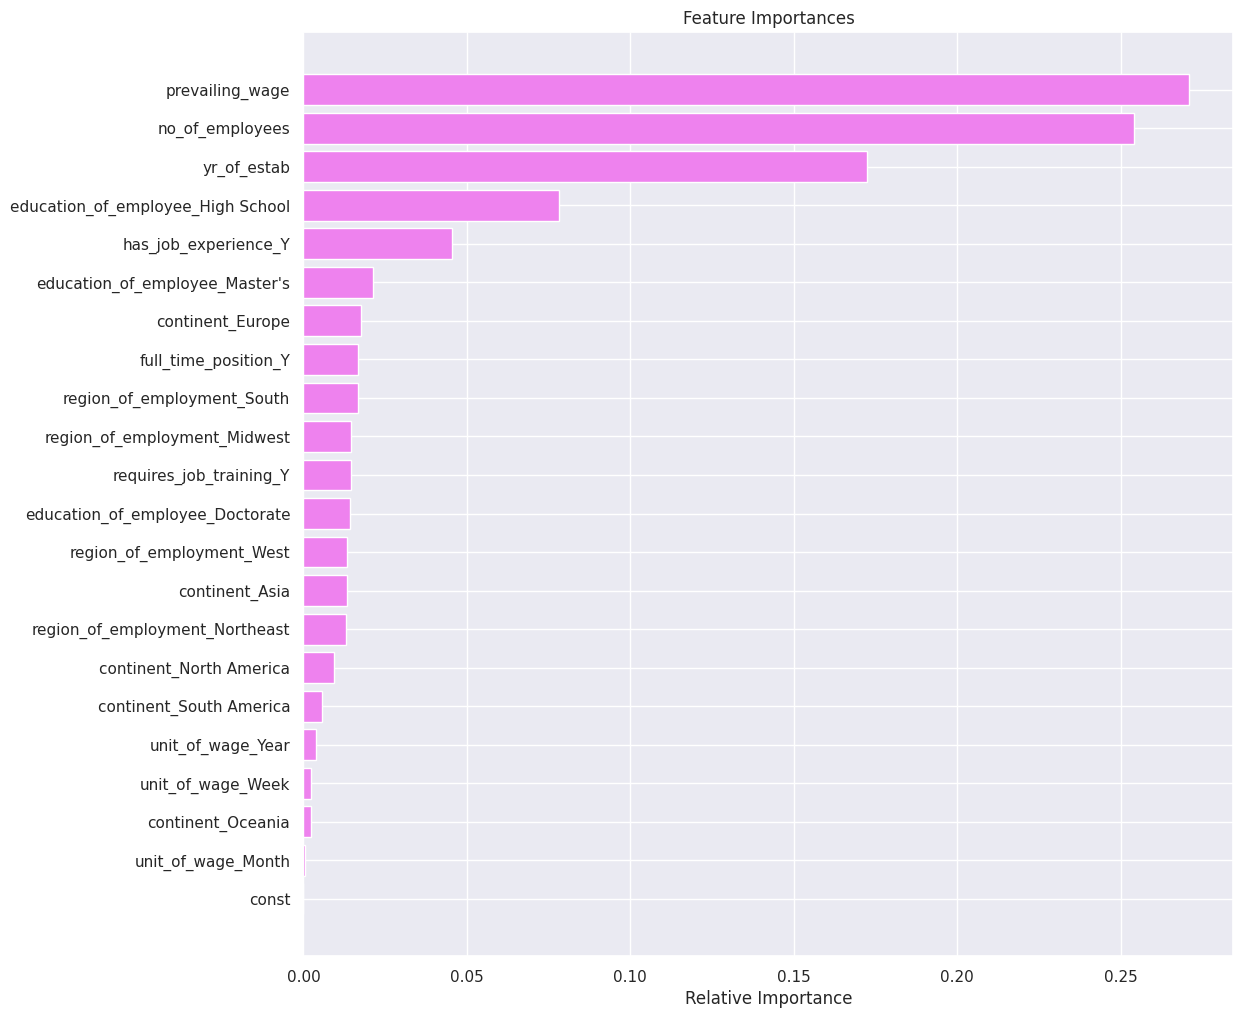

In [ ]:
#important features of the final model

feature_names = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most important factor to being visa approved is prevailing wage, followed by the number of employees the business has and the business's year of establishment.

## Actionable Insights and Recommendations

1.   Most important variable for visa approval is prevailing wages. Other variables such as the unit of wage (paying employees weekly, monthly, or yearly) and the employee's continent of origin are less important to the visa approval process.
2.   What would make an employee the most suitable and likely to be visa certified are variables such as education and previous work experience.
3. Companies can use this model to determine an applicant's likeliness to be approved or denied for the visa process. However, the importance of reviewing people for likeliness to pass is still important - if someone doesn't meet every factor, it doesn't mean they can't get visa approved. In addition to that, some factors can be controlled by the employer. Ensuring that employees are paid prevailing wages and the business's years of being established are higher factors in the visa approval process.

4. As per the data and variables from the chart above, the importance of potential employees from Europe is highest for this continent of origin and are most likely to pass visa approval out of all the continents of origin. The importance of being from Oceania has the least amount of importance for potential employees. However, South America has the smallest percentage of visa approvals overall as per the data from the exploratory data analysis. However, the importance of having a diverse community of employees for businesses to remain competitive cannot be understated. Businesses shouldn't only hire European employees since they're the most likely to pass the visa process, but instead focus on the education of the employees as well as ensure that they provide prevailing wages, have been established for a long period of time, and have a high number of employees to help potential employers in the visa approval process.

In [ ]:
%%shell
jupyter nbconvert --to html /content/Heerdink_Noah_EasyVisa_Fullcode.ipynb

[NbConvertApp] Converting notebook /content/Heerdink_Noah_EasyVisa_Fullcode.ipynb to html
[NbConvertApp] Writing 3476193 bytes to /content/Heerdink_Noah_EasyVisa_Fullcode.html
